# Separación de variables

En el método de separación de variables proponemos una descomposición
aditiva o multiplicativa de la solución para nuestra ecuación diferencial
parcial.

Supongamos que queremos encontrar una función $u(x, y)$, entonces sería
algo como:

- $u(x, y) = X(x) Y(x)$; o
- $u(x, y) = X(x) + Y(y)$.


El método suele usarse para ecuaciones diferenciales lineales en su forma
multiplicativa, así que nos referiremos a esto, salvo que se diga
lo contrario.


Este método puede usarse para resolver problemas de valores en la frontera
con las siguientes características:

1. La EDP es lineal y homogénea (no necesariamente de coeficientes
   constantes.
   
2. Las condiciones de frontera son de la forma:

   \begin{align*}
   &\alpha u_x(0, t) + \beta u(0, t) = 0\, ,\\
   &\gamma u_x(1, t) + \delta u(1, t) = 0\ ,
   \end{align*}
   
   con $\alpha$, $\beta$, $\gamma$ y $\delta$ constante.

## Ejemplo

Ilustremos el método resolviendo la siguiente EDP

$$u_t = \alpha^2 u_{xx}\, ,\quad 0 < x < 1\, , 0 < t < \infty\, ,$$

con condiciones de frontera

$$u(0, t) = u(1, t) = 0\, ,\quad  0\leq t\leq \infty$$

y condiciones iniciales

$$ u(x, 0) = \phi(x), \quad 0 \leq x \leq 1\, .$$

/
En este método buscamos soluciones de la forma

$$u(x, t) = X(x) T(t)\, ,$$

es decir, para las condiciones de frontera dadas, la forma
de la solución será la misma y se escalará con el tiempo.
Esto se muestra en la siguiente figura.

<img src="img/soluciones_tiempo.svg"
     width=600>
     
Al final terminaremos con un conjunto de soluciones
$u_n(x, t) = X_n(x) T_n(t)$, y la solución más general
sería de la forma

$$u(x, t) = \sum_{n=1}^{\infty} A_n X_n(x) T_n(t)\, .$$

A continuación se ilustra paso a paso el método.

### Paso 1: Encontrar las soluciones elementales

Para este paso sustituimos $X(x) T(t)$ en la EDP y
obtenemos

$$X(x) T'(t) = \alpha^2 X''(x) T(t)\, .$$

En donde las $'$ denotan derivadas totales ya que cada
función es de una variable en este caso. Ahora,
dividimos ambos lados de la ecuación por $X(x) T(t)$, para
obtener

$$\frac{T'(t)}{\alpha^2 T(t)} = \frac{X''(x)}{X(x}\, ,$$

y obtenemos las **variables separadas**.

<div class="alert alert-warning">

Este punto es clave. Podemos notar que tenemos al lado izquiero
una función de $t$ y al lado derecho una función de $x$. Sin embargo,
estás dos funciones son iguales. Por tanto, esto debe ser igual
a una constante.

</div>

Igualando a una constante obtenemos

$$\frac{T'(t)}{\alpha^2 T(t)} = \frac{X''(x)}{X(x} = k\, ,$$

o

\begin{align*}
&T' - k \alpha^2 T = 0\, ,\\
&X'' - kX = 0\, ,
\end{align*}

y ahora podemos resolver las dos EDO resultantes.

En este caso queremos que $T(t)$ vaya a cero cuando $t\rightarrow \infty$,
por tanto queremos una constante negativa, $k = -\lambda^2$. Y obtenemos


\begin{align*}
&T' +  \lambda^2 \alpha^2 T = 0\, ,\\
&X'' - \lambda^2 X = 0\, .
\end{align*}

La solución de estas ecuaciones es


\begin{align*}
&T(t) = C e^{-\lambda^2 \alpha^2 t}\, ,\\
&X(x) = A \sin\lambda x + B\cos\lambda x\, ,
\end{align*}

y, entonces,

$$u(x, t) = e^{-\lambda^2\alpha^2 t}[A \sin\lambda x + B \cos\lambda x]\, ,$$

es solución.

Podemos verificar que este tipo de funciones satisfacen la
ecuación diferencial.

In [1]:
%matplotlib widget

In [2]:
from sympy import *

In [3]:
init_session()

IPython console for SymPy 1.13.0 (Python 3.12.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.13.0/



In [4]:
lamda, alpha = symbols("lambda alpha")
A, B = symbols("A B")

In [5]:
u = exp(-lamda**2 * alpha**2 * t)*(A*sin(lamda*x) + B*cos(lamda*x))
u

In [6]:
u.diff(t) - alpha**2 * u.diff(x, 2)

### Paso 2: Soluciones que sastifaces condiciones de frontera

De todas las soluciones que satisfacen la EDP nos interesan las que
satisfagan las condiciones de frontera. Al evaluarlas en la
condición de la izquierda obtenemos lo siguiente

$$u(0, t) = B e^{-\lambda^2 \alpha^2 t} = 0\, ,$$

que implica $B=0$. Para la condición de la derecha obtenemos

$$u(1, t) = A e^{-\lambda^2 \alpha^2 t} \sin \lambda = 0\, .$$

En este caso tenemos dos posibilidades. Si $A = 0$, entonces la
solución al problema sería $u = 0$, que no es de nuestro interés.
La otra opción sería

$$\sin \lambda = 0\, ,$$

que implica

$$\lambda = \pm \pi, \pm 2\pi, \pm 3\pi, \cdots
 = \pm n\pi\quad \forall n\in\mathbb{N}\, .$$
 
Y nuestras soluciones que satisfacen las condiciones
de frontera serían

$$u_n(x, t) = A_n e^{-(n \pi \alpha)^2 t} \sin(n\pi x)\quad \forall n\in\mathbb{N}\, .$$

In [7]:
un = A*exp(-(n*pi*alpha)**t)*sin(n*pi*x)
un

In [8]:
un.subs(x, 0)

In [9]:
un.subs(x, 1)

<div class="alert alert-warning">

Podemos ver que sólo determinamos 1 de las constantes. Con la
otra condición encontramos cuáles debían ser los valores de
la constante de separación que hacían que las condiciones de
frontera se sastisficieran.

Esto es usual de este tipo de problemas ya que estamos resolviendo
un problema de valores propios. En este caso los valores propios
están dados por $\lambda_n^2 = (n\pi)^2$ y los vectores propios
(o funciones propias) están dadas por $X_n = \sin(\lambda_n x)$.

Este constituye un problema de **Sturm-Liouville**. Y es común
que aparezcan en el proceso de separación de variables en la parte
espacial del problema.
</div>

### Paso 3: Soluciones que satisfagan condiciones de frontera y condiciones iniciales

Como tenemos un problema lineal y encontramos infinitas soluciones
particulares, la solución más general sería

$$u(x, t) = \sum_{n=1}^\infty A_n e^{-(n\pi \alpha)^2t} \sin(n\pi x)\, .$$

Para encontrar los coeficientes $A_n$ usamos la condición inicial


$$u(x, 0) = \phi(x)\, ,$$

es decir,

$$\phi(x) = \sum_{n=1}^\infty A_n \sin(n\pi x)\, .$$


Que, como podemos ver, es la representación de la función $\phi(x)$
en la base $\{\sin(n\pi x)| n\in\mathbb{N}\}$.

Por tanto, la solución es

$$u(x, t) = \sum_{n=1}^\infty A_n e^{-(n\pi\alpha)^2 t}\sin(n\pi x)\, ,$$

con

$$A_n = 2\int\limits_{0}^{1} \phi(x) \sin(n\pi x)\mathrm{d}x\, .$$


Para encontrar esta última expresión, multiplicamos

$$\phi(x) = \sum_{n=1}^\infty A_n \sin(n\pi x)\, ,$$

por $\sin(m\pi x)$ a ambos lados e integramos entre 0 y 1. Al hacer
uso de la ortogonalidad llegamos a los coeficientes esperados.


<div class="alert alert-warning">

Podemos decir que en este problema encontramos una base para las soluciones
del problema de valores en la frontera y que luego podemos expresar su
solución como una combinación lineal de estas funciones.

</div>

### Ejemplo específico

Supongamos que

$$\phi(x) = \frac{1}{2} - \left|x - \frac{1}{2}\right| \, ,$$

In [10]:
phi = S(1)/2 - Abs(x - S(1)/2)

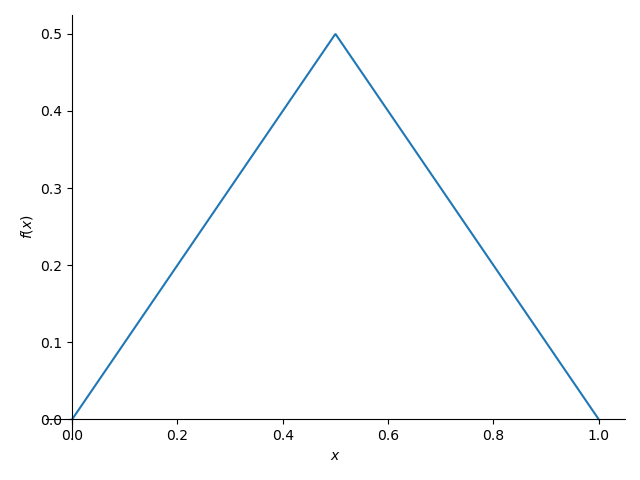

In [11]:
plot(phi, (x, 0, 1))

Entonces, el coeficiente estaría dado por lo siguiente.

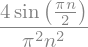

In [12]:
n = symbols("n", positive=True, integer=True)
An = 2*integrate(phi*sin(n*pi*x), (x, 0, 1))
An

Nuestra solución general sería la siguiente.

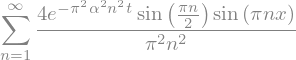

In [13]:
u_final = summation(An*exp(-(n*pi*alpha)**2*t)*sin(n*pi*x), (n, 1, oo))
u_final

Podemos verificar que satisface la ecuación diferencial.

In [14]:
simplify(u_final.diff(t) - alpha**2 * u_final.diff(x, 2))

Podemos verificar las condiciones de frontera.

In [15]:
simplify(u_final.subs(x, 0))

In [16]:
simplify(u_final.subs(x, 1))

Y las condiciones iniciales.

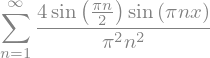

In [17]:
u_final.subs(t, 0)

## Referencias

- Farlow, S. J. (1993). Partial differential equations for scientists and engineers. Courier Corporation.

- Kreyszig, E. (2009). Advanced Engineering Mathematics 10th Edition.